In [1]:
import matplotlib.pyplot as plt 
import cv2
%matplotlib inline

In [2]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
cat4 =cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

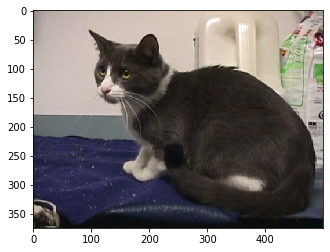

In [3]:
plt.imshow(cat4)

In [4]:
cat4.shape

(375, 500, 3)

In [5]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

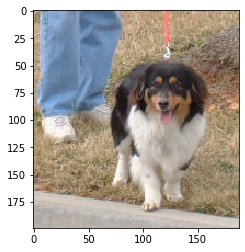

In [6]:
plt.imshow(dog)

In [7]:
dog.shape

(199, 188, 3)

In [8]:
# generate more images based on existing ones
from keras.preprocessing.image import ImageDataGenerator

In [9]:
image_gen =  ImageDataGenerator(rotation_range=30, # rotates new images
                               width_shift_range=0.1, # widens new images
                               height_shift_range=0.1, # heightens new images
                               rescale=1/255, # image/255
                               shear_range=0.2, # crops new images
                               zoom_range=0.2, # zooms new images
                               horizontal_flip=True, # creates horizontally flipped images
                               fill_mode='nearest') # fills missing pixels lost be widening


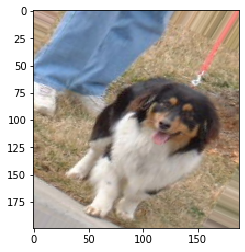

In [16]:
plt.imshow(image_gen.random_transform(dog))

In [17]:
# generate many manipulated images from the database
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [22]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten, Conv2D, MaxPooling2D

In [23]:
model = Sequential()
# input_shape here is the average of most images
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

# dropout layer
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', # binary classification
             optimizer='adam',
             metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [25]:
batch_size = 16
input_shape = (150,150,3) # target size (images will be adapted to be around this size)
train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size = input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 18743 images belonging to 2 classes.


In [26]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size = input_shape[:2],
                                               batch_size = batch_size,
                                               class_mode = 'binary')

Found 6251 images belonging to 2 classes.


In [27]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [28]:
# steps_per_epoch means we are taking 16 images (batch_size) 150 times -> 2400 pictures per epoch
# to limit the time
results = model.fit_generator(train_image_gen,epochs=1,steps_per_epoch=150,
                             validation_data=test_image_gen,validation_steps=12)

Epoch 1/1
150/150 [==============================] - 105s 697ms/step - loss: 0.6988 - accuracy: 0.5100 - val_loss: 0.6821 - val_accuracy: 0.5156


In [29]:
import warnings
warnings.filterwarnings('ignore')

In [31]:
results.history['accuracy']

[0.51]

In [32]:
# loading a trained model
from keras.models import load_model

In [33]:
new_model = load_model('Computer-Vision-with-Python/06-Deep-Learning-Computer-Vision/cat_dog_100epochs.h5')

In [35]:
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'

In [36]:
# predictiong on a new image 
from keras.preprocessing import image

dog_img = image.load_img(dog_file, target_size=(150,150))
dog_img = image.img_to_array(dog_img)

In [37]:
dog_img.shape

(150, 150, 3)

In [38]:
import numpy as np

dog_img = np.expand_dims(dog_img,axis=0)

In [39]:
dog_img.shape # we need to expand the shape so the NN thinks this is a batch of 1

(1, 150, 150, 3)

In [40]:
dog_img = dog_img/255
model.predict_classes(dog_img) # here shows prediction

array([[1]], dtype=int32)

In [41]:
model.predict(dog_img) # here shows how sure it was that it was a dog

array([[0.5208143]], dtype=float32)